In [1]:
cd /content/drive/My Drive/Facebook Stock Price Prediction

/content/drive/My Drive/Facebook Stock Price Prediction


# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional,Dropout

# Loading Data

In [3]:
data=pd.read_csv('facebook_data.csv')

In [4]:
data.tail()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,261.79,263.330,256.9000,257.81,20215504,261.79,263.330,256.9000,257.81,20215504,0.0,1.0
1253,261.90,266.085,260.1000,261.98,20142546,261.90,266.085,260.1000,261.98,20142546,0.0,1.0
1254,266.63,268.330,264.8000,265.35,20009801,266.63,268.330,264.8000,265.35,20009801,0.0,1.0
1255,259.94,265.150,259.1800,261.21,16367597,259.94,265.150,259.1800,261.21,16367597,0.0,1.0
1256,264.65,264.865,260.8401,262.20,12822252,264.65,264.865,260.8401,262.20,12822252,0.0,1.0


In [5]:
close=data['close']

In [6]:
close=np.array(close)

In [7]:
close

array([ 92.47,  93.24,  94.26, ..., 266.63, 259.94, 264.65])

# Data Pre-Processing

## Scaling the data

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mm=MinMaxScaler()

In [10]:
close_scaled=mm.fit_transform(close.reshape(-1,1))

In [11]:
close_scaled

array([[0.        ],
       [0.0036417 ],
       [0.00846576],
       ...,
       [0.82368521],
       [0.79204502],
       [0.81432085]])

In [12]:
mm.data_max_

array([303.91])

In [13]:
mm.data_min_

array([92.47])

## Plotting the data

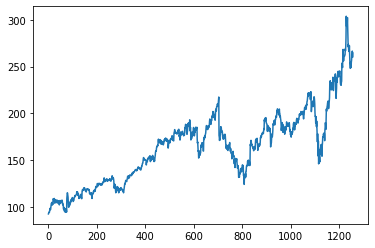

In [14]:
plt.plot(close)

## Transform the data into timestamped sequences

In [15]:
close_scaled.shape

(1257, 1)

In [16]:
value=[]
seq=[]
for i in range(0,1156):
  seq.append(close_scaled[i:100+i])
  value.append(close_scaled[i+100])

In [17]:
len(seq)

1156

# Splitting the data into train-test split

In [18]:
# Training Data
x_train=seq[:int(0.7*len(seq))]
y_train=value[:int(0.7*len(seq))]

In [19]:
# Testing Data
x_test=seq[int(0.7*len(seq)):]
y_test=value[int(0.7*len(seq)):]

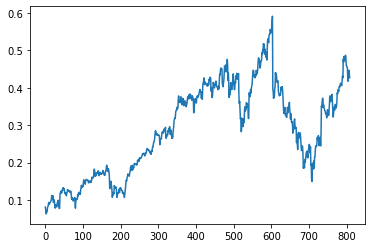

In [20]:
# Plotting the training data
plt.plot(y_train)

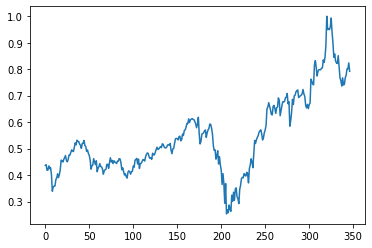

In [21]:
# Plotting the testing data
plt.plot(y_test)

# Model Architecture

In [22]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [23]:
x_train.shape

(809, 100, 1)

In [24]:
y_test.shape

(347, 1)

In [31]:
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True),input_shape=(100,1)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mse')

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 100, 200)          81600     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,865
Trainable params: 328,865
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [33]:
model.fit(x_train,y_train,epochs=100,verbose=2)

Epoch 1/100
26/26 - 8s - loss: 0.0141
Epoch 2/100
26/26 - 8s - loss: 0.0019
Epoch 3/100
26/26 - 8s - loss: 9.5926e-04
Epoch 4/100
26/26 - 8s - loss: 6.7576e-04
Epoch 5/100
26/26 - 8s - loss: 6.9039e-04
Epoch 6/100
26/26 - 8s - loss: 6.5736e-04
Epoch 7/100
26/26 - 8s - loss: 6.0274e-04
Epoch 8/100
26/26 - 8s - loss: 5.9917e-04
Epoch 9/100
26/26 - 8s - loss: 5.4070e-04
Epoch 10/100
26/26 - 8s - loss: 5.6815e-04
Epoch 11/100
26/26 - 8s - loss: 5.8223e-04
Epoch 12/100
26/26 - 8s - loss: 6.6118e-04
Epoch 13/100
26/26 - 8s - loss: 4.8981e-04
Epoch 14/100
26/26 - 8s - loss: 4.6679e-04
Epoch 15/100
26/26 - 8s - loss: 4.6479e-04
Epoch 16/100
26/26 - 8s - loss: 4.8308e-04
Epoch 17/100
26/26 - 8s - loss: 4.6999e-04
Epoch 18/100
26/26 - 8s - loss: 5.3400e-04
Epoch 19/100
26/26 - 8s - loss: 4.1603e-04
Epoch 20/100
26/26 - 8s - loss: 4.3019e-04
Epoch 21/100
26/26 - 8s - loss: 3.7177e-04
Epoch 22/100
26/26 - 8s - loss: 3.6382e-04
Epoch 23/100
26/26 - 8s - loss: 3.5249e-04
Epoch 24/100
26/26 - 8s - lo

In [34]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 1s 71ms/step - loss: 0.0015


0.001541738398373127

In [35]:
y_pred=model.predict(x_test)

# Metrics Report

In [36]:
import sklearn.metrics as m

In [37]:
print("Mean Square Error is ",str(m.mean_squared_error(y_test,y_pred)))

Mean Square Error is  0.0015417382048261512


In [39]:
print("Mean Absolute Error is ",str(m.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is  0.030247870332311563


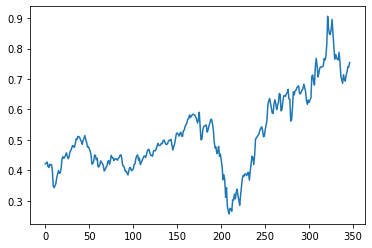

In [40]:
# Y Pred Plot
plt.plot(y_pred)

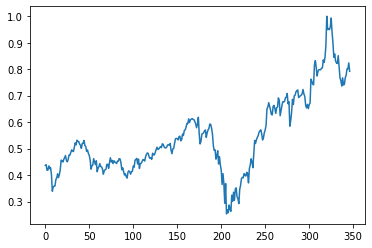

In [41]:
# Y Test Plot

plt.plot(y_test)

In [42]:
model.save('model.h5')